In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [0]:
df =  pd.read_csv('gdrive/My Drive/Colab Notebooks/BreastCancerWisconsin.csv')

In [0]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
len(df.columns)


33

In [0]:
#drop the unneccessary columns 
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [0]:
len(df.columns)


31

In [0]:
#check for NaN value 
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [0]:
#chnage to 1 and 0 instead of Maliginent and beningn 
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [0]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [0]:
features_mean=list(df.columns[1:11])
features_df = df.iloc[:,1:11]
target_df = df.iloc[:,0:1]

# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

In [0]:
features_df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


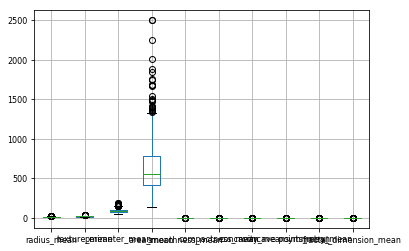

In [0]:
import seaborn as sns

features_df.boxplot()


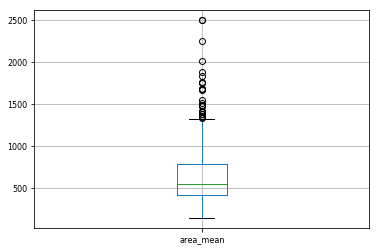

In [0]:
features_df.boxplot(column='area_mean')

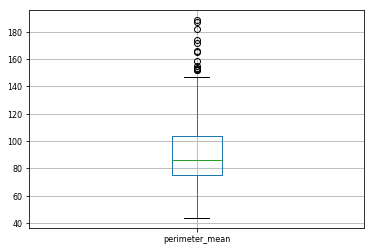

In [0]:
features_df.boxplot(column=[ 'perimeter_mean'])

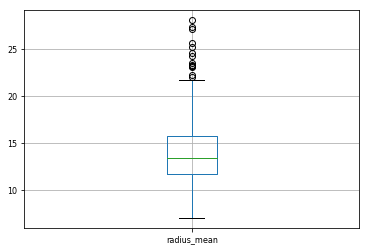

In [0]:
features_df.boxplot(column=['radius_mean'])

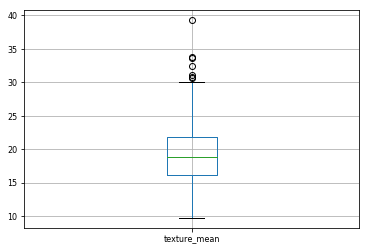

In [0]:
features_df.boxplot(column=['texture_mean'])

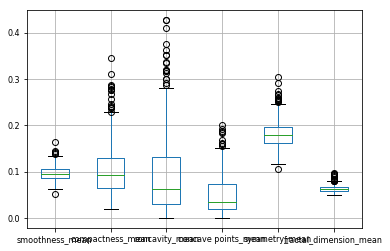

In [0]:
features_df.boxplot(column=['smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean'])

In [0]:
from scipy import stats
df_no_outliers  = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
features_mean_no=list(df_no_outliers.columns[1:11])
features_df_no = df_no_outliers.iloc[:,1:11]
target_df_no = df_no_outliers.iloc[:,0:1]


In [0]:
df_no_outliers.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [0]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [0]:
df_no_outliers['diagnosis'].value_counts()

0    332
1    163
Name: diagnosis, dtype: int64

In [0]:
df_outliers= pd.merge(df, df_no_outliers, how='outer', indicator=True)
df_outliers[df_outliers._merge == 'left_only'].drop('_merge', axis=1)

The outliers were biased towards classification 1. 

The probability to be an outliers is:
P(outlier) = 1- (332+163)/ (357 + 212) ≈ 0.13 
We will assume that this holds true for all cases, even the ones not in the dataset. 


Now we have three dataframes. 
 1. The entire dataset 
 2. The dataset without outliers 
 3. Only outliers of the dataset 
 
 
 We want to investigate if we can predict breast cancer with ML based on this data. Using the dataframes above we will investigate two approaches. 
 1. ML on the entire dataset 
 2. An if statement to determine if a persons data would be an outlier or not, then ML on dataframe 2 or 3.
 

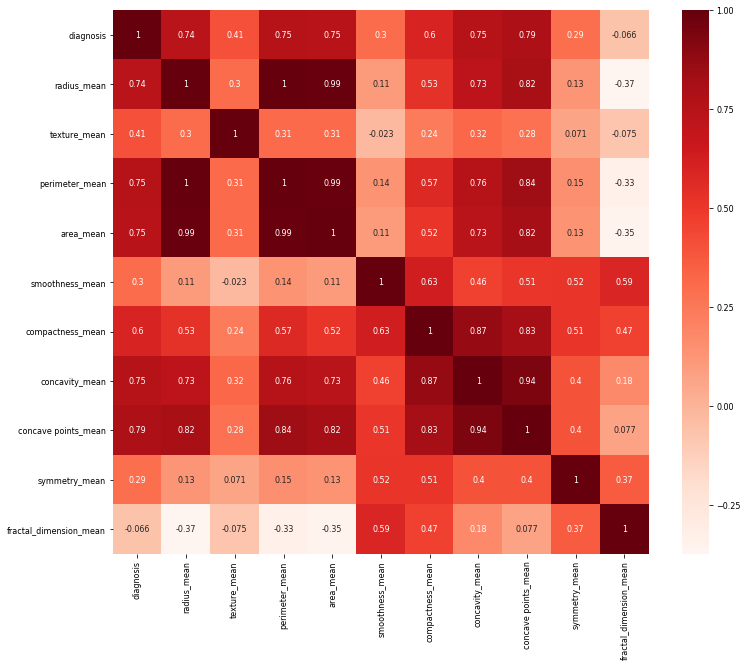

In [0]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_no_outliers.iloc[:,0:11].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
#Correlation with output variable
cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

diagnosis              1.000000
radius_mean            0.741254
perimeter_mean         0.754245
area_mean              0.745664
compactness_mean       0.602065
concavity_mean         0.752845
concave points_mean    0.790748
Name: diagnosis, dtype: float64

In [0]:
#Correlation with output variable
cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

diagnosis              1.000000
radius_mean            0.741254
texture_mean           0.407111
perimeter_mean         0.754245
area_mean              0.745664
smoothness_mean        0.304018
compactness_mean       0.602065
concavity_mean         0.752845
concave points_mean    0.790748
Name: diagnosis, dtype: float64

Depending on the cutoff value for the correlation we will either include/exclude variables:

- smoothness_mean
- texture_mean

Going forward we will consider three different sets of features.
1. All features 
2. With cutoff value 0.3 
3. With cutoff value 0.5

In [0]:
#All the data, All the features 
df = df 
features_df = df.iloc[:,1:11]
target_df = df.iloc[:,0:1]

#All the data, cut-off value 0.5
df_p05 = df[['diagnosis','radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean']]
features_df_p05 = df_p05.iloc[:,1:7]
target_df_p05 = df_p05.iloc[:,0:1]


#All the data, cut-off value 0.3
df_p03 = df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
features_df_p03 = df_p03.iloc[:,1:9]
target_df_p03 = df_p03.iloc[:,0:1]



In [0]:
scores_all_all = ML_testing(features_df,target_df ) 
scores_all_p05 = ML_testing(features_df_p05,target_df_p05 ) 
scores_all_p03 = ML_testing(features_df_p03,target_df_p03 ) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this

[09:12:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this

[09:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this

[09:12:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
#No outliers, All the features 
df_no_outliers
features_df_no_outliers = df_no_outliers.iloc[:,1:11]
target_df_no_outliers = df_no_outliers.iloc[:,0:1]


#No outliers, cut-off value 0.5
df_no_outliers_p05 = df_no_outliers[['diagnosis','radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean']]
features_df_no_outliers_p05 = df_no_outliers_p05.iloc[:,1:7]
target_df_no_outliers_p05 = df_no_outliers_p05.iloc[:,0:1]


#No outliers, cut-off value 0.3
df_no_outliers_p03 = df_no_outliers[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
features_df_no_outliers_p03 = df_no_outliers_p03.iloc[:,1:7]
target_df_no_outliers_p03 = df_no_outliers_p03.iloc[:,0:1]


In [0]:
scores_no_outliers_all = ML_testing(features_df_no_outliers,target_df_no_outliers ) 
scores_no_outliers_p05 = ML_testing(features_df_no_outliers_p05,target_df_no_outliers_p05 ) 
scores_no_outliers_p03 = ML_testing(features_df_no_outliers_p03,target_df_no_outliers_p03 ) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this

[09:16:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this

[09:16:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this

[09:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
#Outliers, All the features 
df_outliers
features_df_outliers = df_outliers.iloc[:,1:11]
target_df_outliers = df_outliers.iloc[:,0:1]


#Outliers, cut-off value 0.5
df_outliers_p05 = df_outliers[['diagnosis','radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean']]
features_df_outliers_p05 = df_outliers_p05.iloc[:,1:7]
target_df_outliers_p05 = df_outliers_p05.iloc[:,0:1]


#Outliers, cut-off value 0.3
df_outliers_p03 = df_outliers[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
features_df_outliers_p03 = df_outliers_p03.iloc[:,1:7]
target_df_outliers_p03 = df_outliers_p03.iloc[:,0:1]

In [0]:
scores_outliers_all = ML_testing(features_df_outliers,target_df_outliers ) 
scores_outliers_p05 = ML_testing(features_df_outliers_p05,target_df_outliers_p05 ) 
scores_outliers_p03 = ML_testing(features_df_outliers_p03,target_df_outliers_p03 ) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this

[09:16:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this

[09:16:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this

[09:16:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
def ML_testing(df_feature_selection,target_df_no ) :
  X_train, X_test, y_train, y_test = train_test_split( df_feature_selection, target_df_no, test_size=0.4, random_state=0)
  scores_list = []


  from sklearn import svm
  clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
  scores_list.append(('SVC (linear): ', clf.score(X_test, y_test)))


  from sklearn import svm
  clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
  scores_list.append(('SVC (rbf): ', clf.score(X_test, y_test)))


  clf=LogisticRegression().fit(X_train, y_train)
  scores_list.append(('LR: ', clf.score(X_test,y_test)))


  clf=DecisionTreeClassifier().fit(X_train, y_train)
  scores_list.append(('DT: ', clf.score(X_test,y_test)))


  clf=RandomForestClassifier().fit(X_train, y_train)
  scores_list.append(('RF: ', clf.score(X_test,y_test)))


  import xgboost as xgb
  clf = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                  max_depth = 5, alpha = 10, n_estimators = 10)
  clf.fit(X_train,y_train)
  scores_list.append(('XGB: ', clf.score(X_test,y_test)))


  clf=GaussianNB().fit(X_train, y_train.values.ravel())
  scores_list.append(('GaussianNB: ', clf.score(X_test,y_test.values.ravel())))


  clf=KNeighborsClassifier(3).fit(X_train, y_train.values.ravel())
  scores_list.append(('Kneighbors: ', clf.score(X_test,y_test.values.ravel())))


  clf=MLPClassifier(alpha=1, max_iter=1000).fit(X_train, y_train.values.ravel())
  scores_list.append(('MLPClassifier: ', clf.score(X_test,y_test.values.ravel())))


  clf=GaussianProcessClassifier(1.0 * RBF(1.0)).fit(X_train, y_train.values.ravel())
  scores_list.append(('GPC: ', clf.score(X_test,y_test.values.ravel())))


  clf=AdaBoostClassifier().fit(X_train, y_train.values.ravel())
  scores_list.append(('ADC: ', clf.score(X_test,y_test.values.ravel())))


  clf=QuadraticDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
  scores_list.append(('QD: ', clf.score(X_test,y_test.values.ravel())))
  
  return scores_list 

In [0]:
print(scores_all_all)
print(scores_all_p05)  
print(scores_all_p03)

[('SVC (linear): ', 0.9210526315789473), ('SVC (rbf): ', 0.7017543859649122), ('LR: ', 0.9254385964912281), ('DT: ', 0.9298245614035088), ('RF: ', 0.9210526315789473), ('XGB: ', 0.6580202661167174), ('GaussianNB: ', 0.9035087719298246), ('Kneighbors: ', 0.8903508771929824), ('MLPClassifier: ', 0.9078947368421053), ('GPC: ', 0.9078947368421053), ('ADC: ', 0.9210526315789473), ('QD: ', 0.9385964912280702)]
[('SVC (linear): ', 0.9122807017543859), ('SVC (rbf): ', 0.7412280701754386), ('LR: ', 0.9078947368421053), ('DT: ', 0.9035087719298246), ('RF: ', 0.9254385964912281), ('XGB: ', 0.5764339836157806), ('GaussianNB: ', 0.8903508771929824), ('Kneighbors: ', 0.8903508771929824), ('MLPClassifier: ', 0.9078947368421053), ('GPC: ', 0.9078947368421053), ('ADC: ', 0.9122807017543859), ('QD: ', 0.9078947368421053)]
[('SVC (linear): ', 0.9254385964912281), ('SVC (rbf): ', 0.6798245614035088), ('LR: ', 0.9254385964912281), ('DT: ', 0.9210526315789473), ('RF: ', 0.9342105263157895), ('XGB: ', 0.6588

RF with p03, ADC with p03, and QD with all featurs 

In [0]:
print(scores_no_outliers_all)
print(scores_no_outliers_p05)
print(scores_no_outliers_p03) 

[('SVC (linear): ', 0.9242424242424242), ('SVC (rbf): ', 0.7222222222222222), ('LR: ', 0.9242424242424242), ('DT: ', 0.9040404040404041), ('RF: ', 0.9343434343434344), ('XGB: ', 0.6626264865748686), ('GaussianNB: ', 0.9292929292929293), ('Kneighbors: ', 0.898989898989899), ('MLPClassifier: ', 0.8838383838383839), ('GPC: ', 0.9141414141414141), ('ADC: ', 0.9444444444444444), ('QD: ', 0.9444444444444444)]
[('SVC (linear): ', 0.9141414141414141), ('SVC (rbf): ', 0.7070707070707071), ('LR: ', 0.9191919191919192), ('DT: ', 0.9090909090909091), ('RF: ', 0.9242424242424242), ('XGB: ', 0.5496070099150441), ('GaussianNB: ', 0.9242424242424242), ('Kneighbors: ', 0.8888888888888888), ('MLPClassifier: ', 0.9040404040404041), ('GPC: ', 0.9141414141414141), ('ADC: ', 0.9040404040404041), ('QD: ', 0.9444444444444444)]
[('SVC (linear): ', 0.9242424242424242), ('SVC (rbf): ', 0.7070707070707071), ('LR: ', 0.9191919191919192), ('DT: ', 0.898989898989899), ('RF: ', 0.9343434343434344), ('XGB: ', 0.507279

RF with p03, GaussianNB with p03, ADC with all features, and QD with p05 

In [0]:
print(scores_outliers_all)
print(scores_outliers_p05)
print(scores_outliers_p03)

[('SVC (linear): ', 0.9210526315789473), ('SVC (rbf): ', 0.7017543859649122), ('LR: ', 0.9254385964912281), ('DT: ', 0.8903508771929824), ('RF: ', 0.9385964912280702), ('XGB: ', 0.6580202661167174), ('GaussianNB: ', 0.9035087719298246), ('Kneighbors: ', 0.8903508771929824), ('MLPClassifier: ', 0.9166666666666666), ('GPC: ', 0.9078947368421053), ('ADC: ', 0.9210526315789473), ('QD: ', 0.9385964912280702)]
[('SVC (linear): ', 0.9122807017543859), ('SVC (rbf): ', 0.7412280701754386), ('LR: ', 0.9078947368421053), ('DT: ', 0.8991228070175439), ('RF: ', 0.9122807017543859), ('XGB: ', 0.5764339836157806), ('GaussianNB: ', 0.8903508771929824), ('Kneighbors: ', 0.8903508771929824), ('MLPClassifier: ', 0.8903508771929824), ('GPC: ', 0.9078947368421053), ('ADC: ', 0.9122807017543859), ('QD: ', 0.9078947368421053)]
[('SVC (linear): ', 0.9210526315789473), ('SVC (rbf): ', 0.6578947368421053), ('LR: ', 0.9210526315789473), ('DT: ', 0.8771929824561403), ('RF: ', 0.9078947368421053), ('XGB: ', 0.5285

RF with all features, QD with all features  

# Conclusion

Random forest with some features removed performed the best with the dataframe that included all datapointsm, the precision was 0.934. 

However the QD with the top 6 features performed at 0.944 for the dataset without outliers and would work together with the QD (with all features) on the dataset with only outliers. 


Based on this I would say that the Random Forest for all the datapoints with the features below performed the best. However, it would be interesting to further analyze subsets of the patients in order to great even better performing algorithms. 

- radius_mean
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave points_mean